# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [3]:
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['job_title'] = df['job_title'].astype('category')
df['salary_currency'] = df['salary_currency'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')

In [4]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h1>1. How many unique job titles are there?</h1>

In [5]:
#answer
unique_job_titles = df['job_title'].nunique()
print(f'There are {unique_job_titles} unique job titles in the dataset.')

There are 93 unique job titles in the dataset.


<h1>2. What is the average salary (salary_in_usd) per work_year?</h1>

In [6]:
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().round(0)
avg_salary_per_year = avg_salary_per_year.reset_index()
avg_salary_per_year

,work_year,salary_in_usd
0,2020,92303.0
1,2021,94087.0
2,2022,133380.0
3,2023,148955.0


<H3>The data shows continued increased from 2020 to 2023:

Salaries rise from 92,303(usd) in 2020 to 148,955(usd) in 2023. which is roughly around 61% increase in just four years.

The increeased occurred between 2021 and 2022, suggesting either market expansion, inflation adjustments, or higher demand for skilled tech professionals during that period.</H3>

<h1>3. Create a bar plot showing average salary by experience_level.</h1>

C:\Users\queja\AppData\Local\Temp\ipykernel_12468\1827163567.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().round(0)


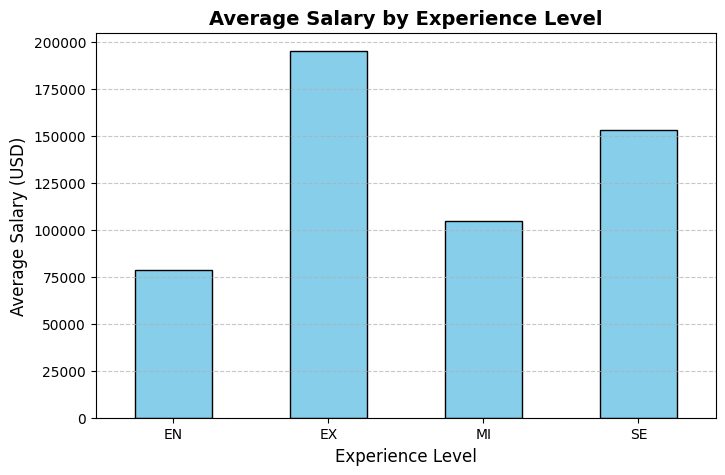

In [7]:
#average salary for each experience level
avg_salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().round(0)

plt.figure(figsize=(8,5))
avg_salary_by_exp.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Experience Level', fontsize=14, weight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>
    The bar chart shows the average salary (in USD) across different experience levels:

1. EN (Entry-level) → Lowest average salary
2. MI (Mid-level) → Moderate growth
3. SE (Senior-level) → Substantial jump
4. EX (Executive-level) → Highest salary range

This pattern reflects how professional experience and responsibility typically drive compensation upward.
</h3>

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [16]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])
le_job = LabelEncoder()
df['job_title_encoded'] = le_job.fit_transform(df['job_title'])

# Choose your features
features = ['work_year', 'experience_level_encoded', 'job_title_encoded', 'salary']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded,job_title_encoded,salary
0,2023,0,8,213660
1,2023,0,8,130760
2,2023,0,41,100000
3,2023,0,22,30000
4,2023,0,8,204620


## 📈 Part 4: Train a Linear Regression Model

In [18]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.17
RMSE: 58486.00


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [22]:
# Map experience levels to encoded values (confirm with le.classes_)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  
    'job_title_encoded': [0, 0, 0, 0],         
    'salary': [0, 0, 0, 0]                    
})

# Predict using the trained model
predicted_salaries = model.predict(future_data)

# Display results neatly
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries.round(2)
})

results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,97884.32
1,Mid,117800.13
2,Senior,137715.93
3,Executive,157631.73


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
   <br>- Yes, The model’s predictions look reasonable. The salaries increase from Entry level 97,884usd to Executive 157,631usd , which makes sense because people with more experience usually earn more and salary increased each year as expected. However, the model is too simple as it assumes that all jobs and locations follow the same pattern, which is not true in real life.
   
2. What are the limitations of using only `work_year` and `experience_level`?
    <br> - The model only uses `work_year` and `experience_level`, which is too limited. It doesn’t include important factors like company size, country, industry, or skills. For example, a Senior Data Analyst and a Senior Machine Learning Engineer may have the same experience level but very different salaries. Because of this missing information, the model’s predictions can be inaccurate.

3. How could you improve this model? (Think: more features, better encoding, etc.)
    <br> - To imporved this model, I think i need to work on adding important  information such as locations, skills and etc. as well as used more advanced model to get an accurate answer or prediction. 

4. Why is **R² not enough** to trust your predictions?
    <br> - A good R² score doesn’t always mean the model is accurate. It only shows how well the model fits the data, not how well it can predict new data. In real life, salaries don’t always increased steadily with experience as they can stay the same or suddenly increase because of promotions, job changes, or new skills. Using other measures, or checking the errors visually, gives a better understanding of how well the model really performs.


> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀